In [4]:
import pandas as pd
from collections import Counter
import itertools

In [5]:
# Load the csv file

dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataframe.isnull().values.any()

False

In [7]:
dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


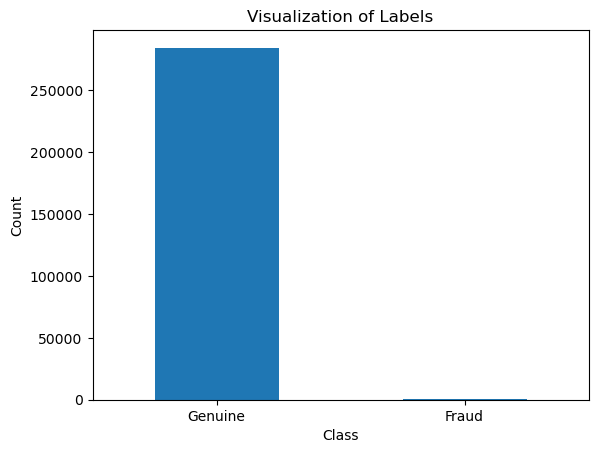

In [9]:
import matplotlib.pyplot as plt

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [11]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [ ]:
# Import the imbalance Learn module
from imblearn.pipeline import make_pipeline ## Create a Pipeline using the provided estimators .
from imblearn.under_sampling import NearMiss  ## perform Under-sampling  based on NearMiss methods. 
from imblearn.over_sampling import SMOTE  ## PerformOver-sampling class that uses SMOTE. 
# import the metrics
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifier
data = RandomForestClassifier()

# Fit the model with the training data
data.fit(train_X, train_Y)

# Predict the target values for the test data
y_pred = data.predict(test_X)

# Evaluate the model using different metrics
print("The accuracy is", accuracy_score(test_Y, y_pred))
print("The precision is", precision_score(test_Y, y_pred, average='weighted'))
print("The recall is", recall_score(test_Y, y_pred, average='weighted'))
print("The F1 score is", f1_score(test_Y, y_pred, average='weighted'))

The accuracy is 0.9996254813150287
The precision is 0.9996142697354997
The recall is 0.9996254813150287
The F1 score is 0.9996090266361278


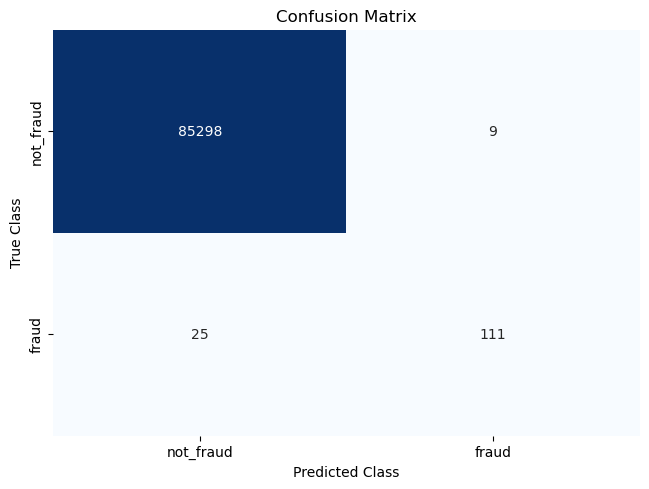

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(test_Y, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming you have your test data and target values in test_X and test_Y
# and you've trained a Decision Tree Classifier model named dt

predictions_data = data.predict(test_X)

confusion_matrix_dt = confusion_matrix(test_Y, predictions_data)
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85301     6]
 [   25   111]]


Confusion matrix, without normalization
[[85301     6]
 [   25   111]]
Normalized confusion matrix
[[85301     6]
 [   25   111]]


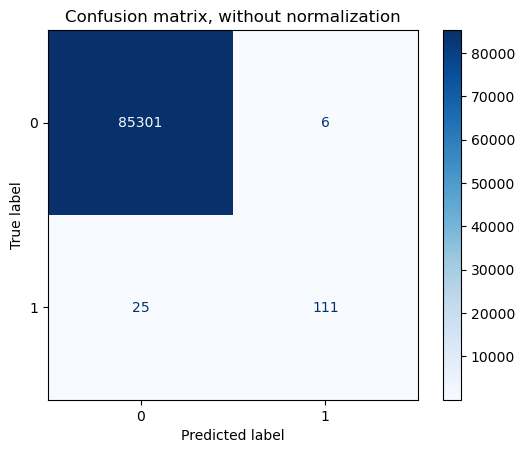

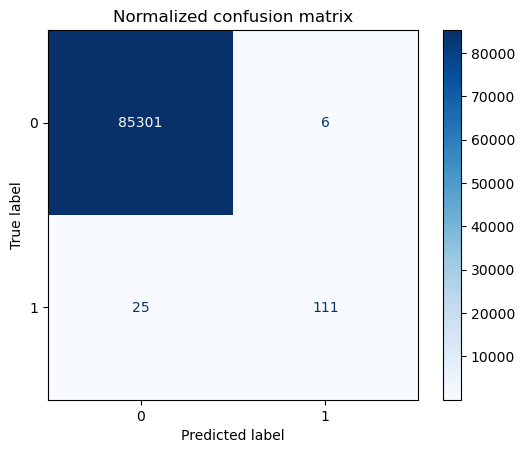

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, 
                                 display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)

    print(title)
    print(confusion_matrix_dt)

plt.show()

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Evaluation of Decision Tree Model")
print()

accuracy = accuracy_score(test_Y, predictions_data.round())
print("Accuracy: ", accuracy)

print("Classification Report: ")
print(classification_report(test_Y, predictions_data.round()))

print("Confusion Matrix: ")
print(confusion_matrix(test_Y, predictions_data.round()))

Evaluation of Decision Tree Model

Accuracy:  0.9996371850239341
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix: 
[[85301     6]
 [   25   111]]
